# Import & Clean the Data

In [1]:
import pandas as pd
import numpy as np
import scipy as stats
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression, LassoCV, RidgeCV
from sklearn.model_selection import train_test_split

%matplotlib inline

In [2]:
df = pd.read_csv('../data/train.csv', keep_default_na=False)

In [3]:
df.isnull().sum().sum()

0

In [4]:
# df.shape

# df.dropna().shape

# df.head()

In [5]:
# Get the list of numeric series names

df.columns

df._get_numeric_data().columns

Index(['Id', 'PID', 'MS SubClass', 'Lot Area', 'Overall Qual', 'Overall Cond',
       'Year Built', 'Year Remod/Add', '1st Flr SF', '2nd Flr SF',
       'Low Qual Fin SF', 'Gr Liv Area', 'Full Bath', 'Half Bath',
       'Bedroom AbvGr', 'Kitchen AbvGr', 'TotRms AbvGrd', 'Fireplaces',
       'Wood Deck SF', 'Open Porch SF', 'Enclosed Porch', '3Ssn Porch',
       'Screen Porch', 'Pool Area', 'Misc Val', 'Mo Sold', 'Yr Sold',
       'SalePrice'],
      dtype='object')

# EDA

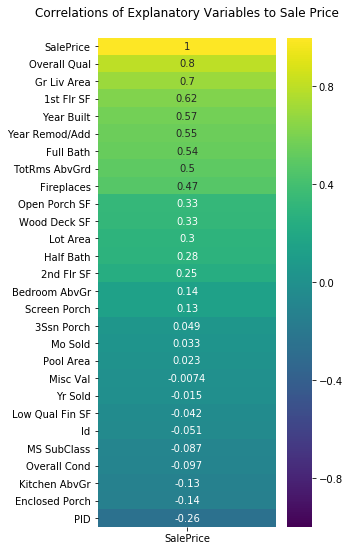

In [6]:
# Explore the correlation with the target vector

plt.figure(figsize=(4,9))
sns.heatmap(df.corr()[['SalePrice']].sort_values(by='SalePrice',
                                                ascending=False),
           vmin=-1,
           vmax=1,
           annot=True,
           cmap='viridis')
plt.title('Correlations of Explanatory Variables to Sale Price\n');

#vmin and vmax make the scale of the correlation data -1:1

# Fit, Train, Test, and Score our Model

In [7]:
X = df[['Overall Qual', 'Gr Liv Area', '1st Flr SF']]
y = df['SalePrice']

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state= 42)

from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
ss.fit(X_train)

X_train_scaled = ss.transform(X_train)
X_test_scaled = ss.transform(X_test)

lcv= LassoCV(n_alphas=200)
lcv.fit(X_train_scaled, y_train)

C:\Users\joeda\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:645: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\joeda\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  # Remove the CWD from sys.path while we load stuff.
C:\Users\joeda\Anaconda3\lib\site-packages\ipykernel_launcher.py:11: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  # This is added back by InteractiveShellApp.init_path()
C:\Users\joeda\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)


LassoCV(alphas=None, copy_X=True, cv='warn', eps=0.001, fit_intercept=True,
    max_iter=1000, n_alphas=200, n_jobs=None, normalize=False,
    positive=False, precompute='auto', random_state=None,
    selection='cyclic', tol=0.0001, verbose=False)

In [8]:
lcv.alpha_

1209.8543537717799

In [9]:
max(lcv.alphas_)

63288.68272864421

In [10]:
min(lcv.alphas_)

63.28868272864418

In [11]:
lcv.score(X_train_scaled, y_train)

0.7403893740612014

In [12]:
lcv.score(X_test_scaled, y_test)

0.7929520836797878

In [13]:
lcv.coef_

array([43624.55648035, 21145.73616767, 13901.54262489])

In [14]:
from sklearn.metrics import mean_squared_error

X_test_preds = lcv.predict(X_test_scaled)

import numpy as np

np.sqrt(mean_squared_error(y_test, X_test_preds))

35655.004228936064

# Submitting Predictions

In [15]:
test = pd.read_csv('../data/test.csv')

test.head()

,Id,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,...,3Ssn Porch,Screen Porch,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type
0,2658,902301120,190,RM,69.0,9142,Pave,Grvl,Reg,Lvl,...,0,0,0,NaN,NaN,NaN,0,4,2006,WD
1,2718,905108090,90,RL,NaN,9662,Pave,NaN,IR1,Lvl,...,0,0,0,NaN,NaN,NaN,0,8,2006,WD
2,2414,528218130,60,RL,58.0,17104,Pave,NaN,IR1,Lvl,...,0,0,0,NaN,NaN,NaN,0,9,2006,New
3,1989,902207150,30,RM,60.0,8520,Pave,NaN,Reg,Lvl,...,0,0,0,NaN,NaN,NaN,0,7,2007,WD
4,625,535105100,20,RL,NaN,9500,Pave,NaN,IR1,Lvl,...,0,185,0,NaN,NaN,NaN,0,7,2009,WD


In [16]:
test_X = test[X.columns]
test_X_s = ss.transform(test_X)
preds = lcv.predict(test_X_s)

C:\Users\joeda\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  


In [17]:
from datetime import datetime

In [18]:
timestamp = str(datetime.now()).replace(':','.').split('.')[0]

to_submit = pd.DataFrame({
    'Id': test['Id'],
    'SalePrice': preds
})

to_submit.to_csv(f'my_submission_{timestamp}.csv', index=False)